[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 15.771137390859415
R-squared: 0.8654820028592994


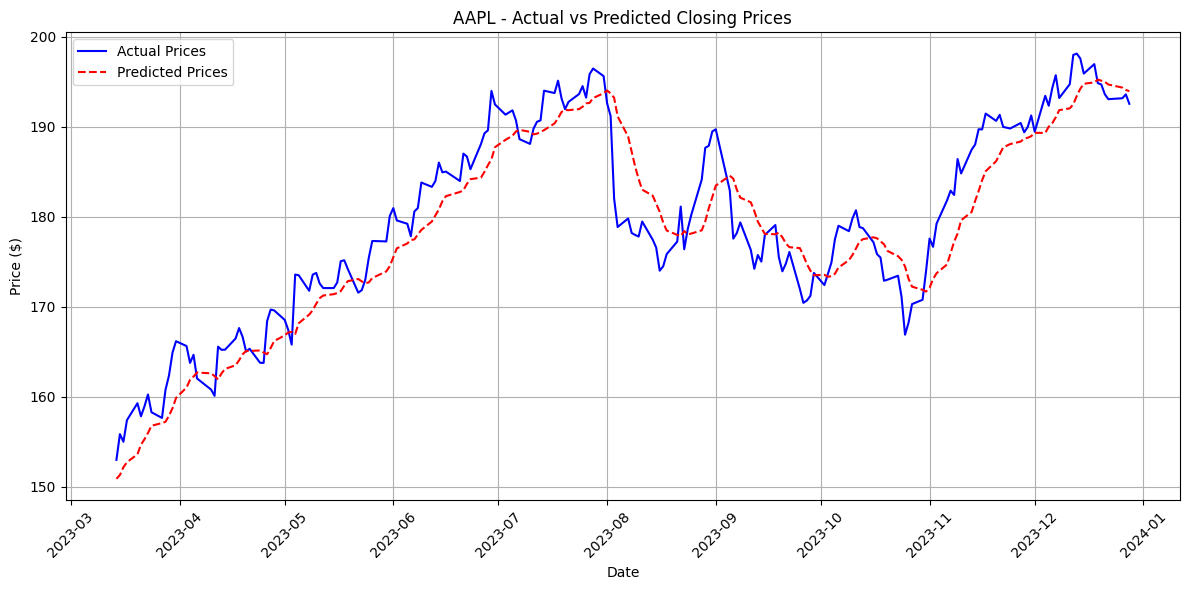

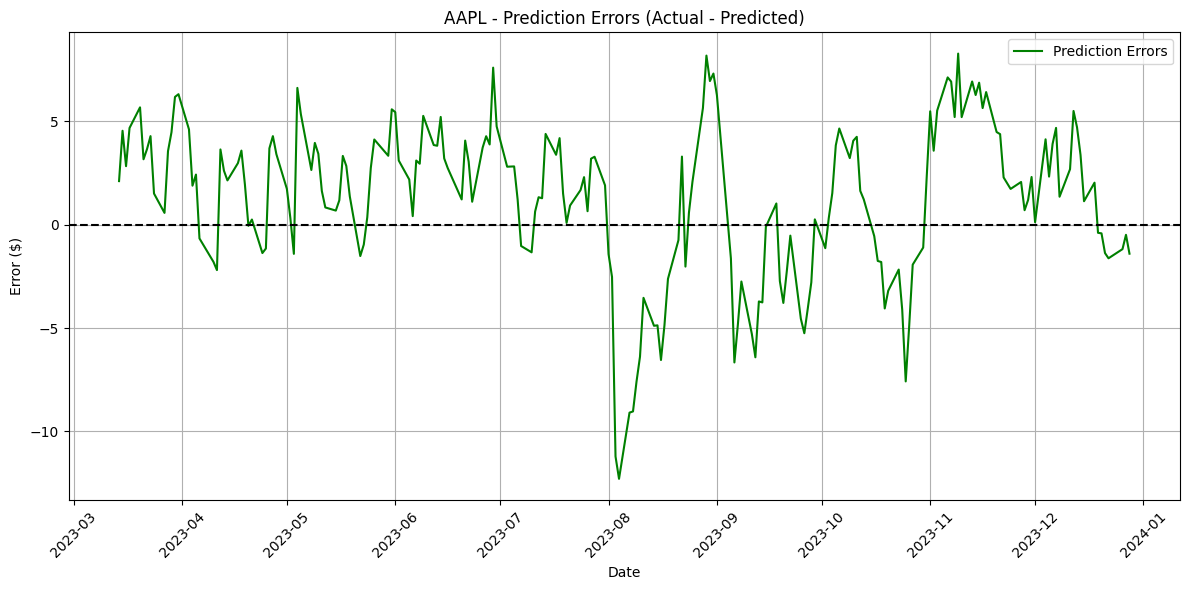

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load historical stock data
ticker = 'AAPL'  # Example stock (Apple)
start_date = '2020-01-01'
end_date = '2024-01-01'

data = yf.download(ticker, start=start_date, end=end_date)

# Calculate 10-day Exponential Moving Average (EMA)
data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()

# Add other technical indicators as needed (e.g., Moving Average Convergence Divergence (MACD), RSI)
# For simplicity, we use only EMA in this case.

# Create features (independent variables)
# Here, we only use 'EMA_10' as the predictor variable for linear regression
data['Target'] = data['Close'].shift(-1)  # Predict next day's closing price

# Drop rows with missing values (due to shifting or insufficient data)
data.dropna(inplace=True)

# Define features (X) and target variable (y)
X = data[['EMA_10']]
y = data['Target']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the results
plt.figure(figsize=(12, 6))

# Plot actual vs predicted prices
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Prices', color='red', linestyle='dashed')

plt.title(f'{ticker} - Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

# Consider the magnitude of errors
errors = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(errors):], errors, label='Prediction Errors', color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title(f'{ticker} - Prediction Errors (Actual - Predicted)')
plt.xlabel('Date')
plt.ylabel('Error ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()
